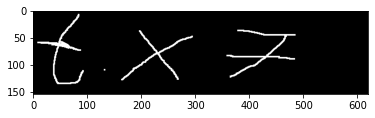

In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
# Opening image
img = cv2.imread('./test13.png')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3,3),np.uint8)
img_gray = cv2.erode(img_gray,kernel,iterations = 1)
img_gray = cv2.bitwise_not(img_gray)
base_size=img_gray.shape[0]+6,img_gray.shape[1]+6
base=np.zeros(base_size,dtype=np.uint8)
base[3:img_gray.shape[0]+3,3:img_gray.shape[1]+3]=img_gray
base = cv2.cvtColor(base, cv2.COLOR_GRAY2RGB)

img_rgb = base

#img_rgb = cv2.bitwise_not(img_rgb)
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

(154, 620, 3)


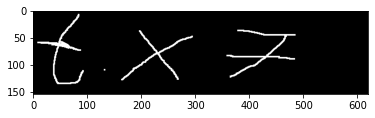

In [69]:
ret,thresh = cv2.threshold(img_rgb,127,255,0)
print(thresh.shape)
plt.subplot(1, 1, 1)
thresh = np.uint8(thresh)
#thresh = cv2.cvtColor(thresh, cv2.COLOR_RGB2GRAY)
#thresh = np.array(thresh,dtype=np.uint8)
plt.imshow(thresh)
plt.show()

In [70]:

contours,h = cv2.findContours(thresh[:,:,0], cv2.RETR_EXTERNAL, 2)

In [71]:
print(len(contours))

4


In [72]:
crops = []
for i in range(len(contours)):
    cnt = contours[i]
    area = cv2.contourArea(cnt)
    x,y,w,h = cv2.boundingRect(cnt)
    if w*h > 50:
        #x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,0,255),2)
        ret,thresh = cv2.threshold(img_gray[y:y+h, x:x+w],127,255,0)
        crops.append([x,y,w,h]) 
#if(len(crops) > 1):
#    crops = crops[: -1]

In [73]:
print(crops)

[[163, 37, 133, 92], [358, 36, 128, 88], [8, 7, 86, 129]]


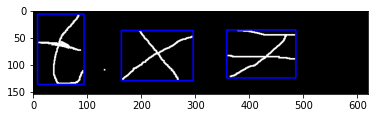

In [74]:
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

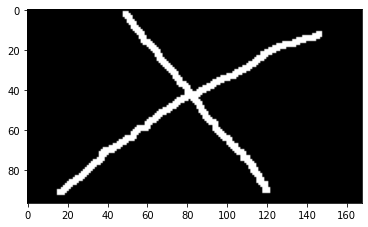

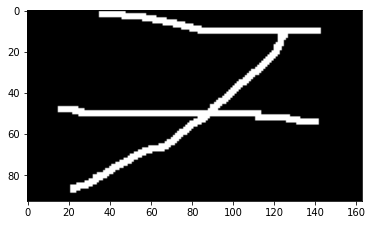

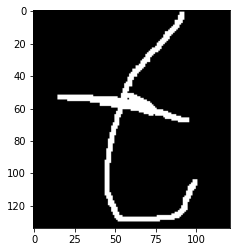

In [75]:
data_img= []
#plt.subplot(1, 1, 1)
for i in range(len(crops)):
    x,y,w,h = crops[i]
    x-=3
    y-=3
    w+=5
    h+=3
    img = img_gray[y:y+h, x:x+w]
    base_size=img.shape[0]+2,img.shape[1]+30
    base=np.zeros(base_size,dtype=np.uint8)
    base[1:img.shape[0]+1,15:img.shape[1]+15]=img
    #plt.imshow(img_gray[y:y+h, x:x+w], cmap="gray")
    plt.imshow(base, cmap="gray")
    data_img.append((x,base))
    plt.show()